安裝必要套件

In [26]:
# install.packages('readxl')
# install.packages(c("corrplot", "ggplot2"))
# install.packages('dplyr')
# install.packages('caret')
# install.packages('skimr')
# install.packages("moments")
# install.packages("MASS")
# install.packages("caTools")
# install.packages("class")








Warning message:
"package 'stats' is in use and will not be installed"


導入套件

In [27]:
library(readxl)
library(corrplot)
library(ggplot2)
library(dplyr)
library(caret)
library(skimr)
library(moments)
library(MASS)
library(caTools)
library(class)










讀取資料

In [2]:

data <- read_excel("concatenated.xlsx")
head(data)


觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),露點溫度(℃),相對溼度(%),⋯,最大瞬間風風向(360degree),今日降雨,明日降雨,日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,總雲量(0~10)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1024.2,1027.9,1026.2,1022.5,16.2,17.4,15.7,14.2,88,⋯,80,Yes,Yes,0.0,0,4.68,15.3,-0.2,3,9.8
2,1022.8,1026.5,1025.5,1020.3,17.0,18.2,15.7,15.0,88,⋯,80,Yes,Yes,0.0,0,4.03,12.5,-0.2,3,10.0
3,1022.4,1026.0,1024.7,1020.2,18.4,20.0,17.1,16.6,89,⋯,90,Yes,No,0.0,0,4.14,10.3,-0.1,2,9.9
4,1018.3,1021.9,1020.2,1015.9,22.0,28.6,19.2,18.2,79,⋯,80,No,Yes,5.5,52,10.53,19.5,1.5,6,7.0
5,1017.5,1021.1,1019.2,1015.9,19.9,22.4,18.8,17.0,83,⋯,90,Yes,Yes,0.0,0,3.30,7.5,-0.7,3,9.6
6,1019.4,1023.0,1021.5,1017.9,18.0,19.3,16.7,15.9,87,⋯,70,Yes,No,0.0,0,3.66,17.3,-0.9,3,10.0


視覺化降雨狀況的數量分布

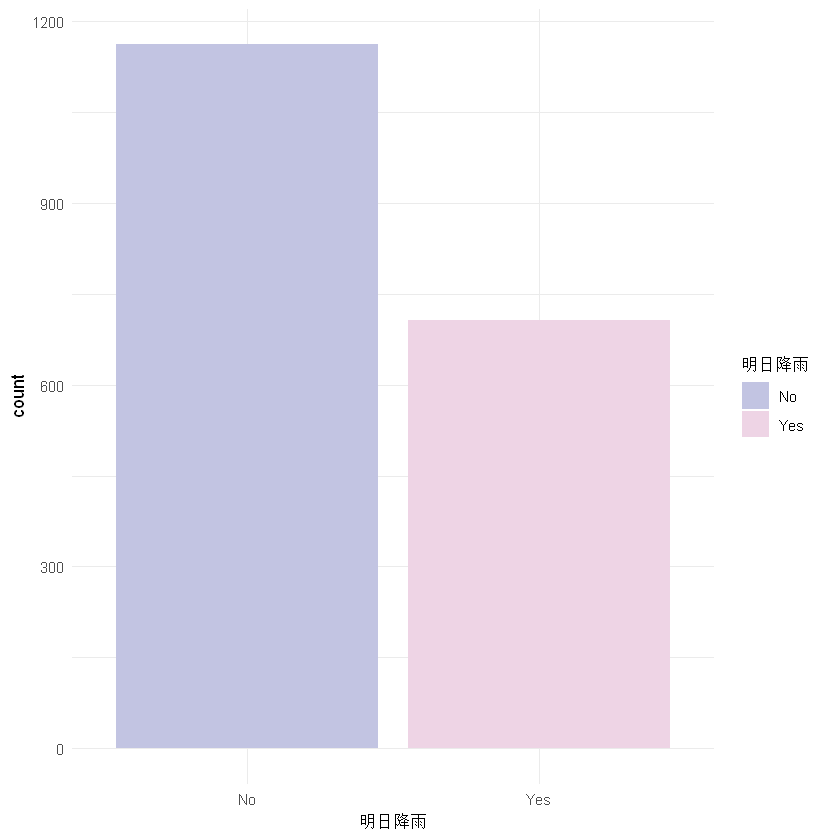

In [3]:
ggplot(data, aes(x = 明日降雨	, fill = 明日降雨	)) +
  geom_bar() +
  scale_fill_manual(values = c("#C2C4E2", "#EED4E5")) +
  theme_minimal()


確認數據的資料型態、數量與種類

In [4]:
str(data)

tibble [1,869 × 24] (S3: tbl_df/tbl/data.frame)
 $ 觀測時間(day)            : num [1:1869] 1 2 3 4 5 6 7 8 9 10 ...
 $ 測站氣壓(hPa)            : num [1:1869] 1024 1023 1022 1018 1018 ...
 $ 海平面氣壓(hPa)          : num [1:1869] 1028 1026 1026 1022 1021 ...
 $ 測站最高氣壓(hPa)        : num [1:1869] 1026 1026 1025 1020 1019 ...
 $ 測站最低氣壓(hPa)        : num [1:1869] 1022 1020 1020 1016 1016 ...
 $ 氣溫(℃)                  : num [1:1869] 16.2 17 18.4 22 19.9 18 20.6 20 18.7 22.7 ...
 $ 最高氣溫(℃)              : num [1:1869] 17.4 18.2 20 28.6 22.4 19.3 24 21.4 20.6 28.3 ...
 $ 最低氣溫(℃)              : num [1:1869] 15.7 15.7 17.1 19.2 18.8 16.7 17.7 18.1 16.8 20.5 ...
 $ 露點溫度(℃)              : num [1:1869] 14.2 15 16.6 18.2 17 15.9 16.7 16.7 15.2 18.1 ...
 $ 相對溼度(%)              : num [1:1869] 88 88 89 79 83 87 79 81 80 75 ...
 $ 最小相對溼度(%)          : num [1:1869] 84 82 86 59 76 80 71 74 74 56 ...
 $ 風速(m/s)                : num [1:1869] 4.2 3.9 3.7 2.5 1.3 2.9 3.7 2.9 5.2 1.7 ...
 $ 風向(360degree)          : num [1

建立相關矩陣

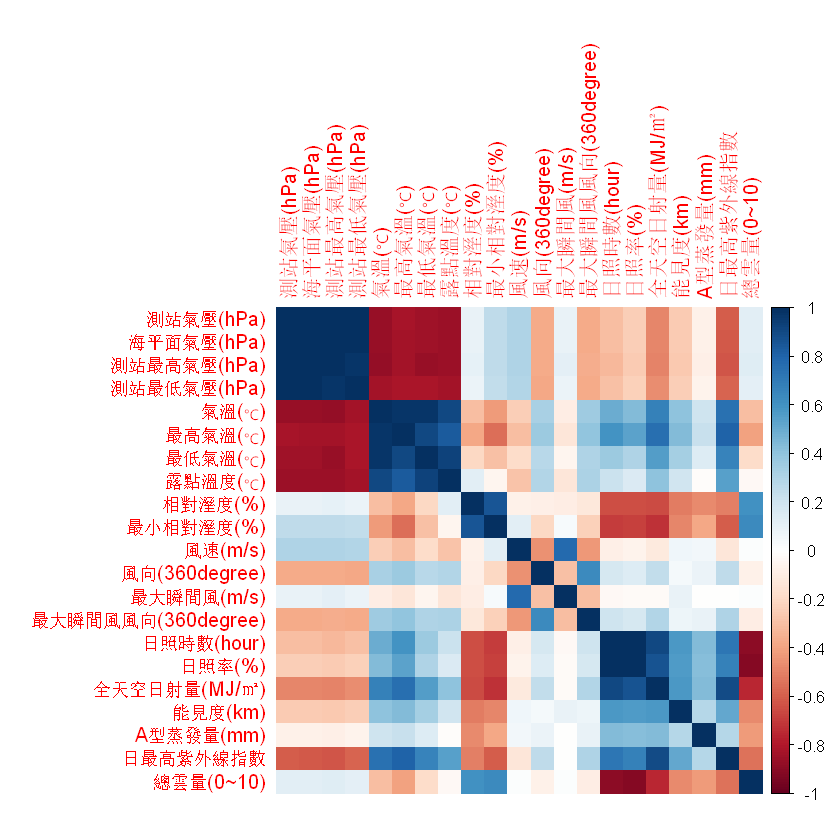

In [5]:
numeric_data <- dplyr::select(data, -c("今日降雨","明日降雨","觀測時間(day)"))
corrmat <- cor(numeric_data)
corrplot(corrmat, method = "color")


將今日降雨與明日降雨轉為數字形式

In [6]:
original_colnames <- colnames(data)

data <- as.data.frame(lapply(data, function(x) as.numeric(as.factor(x))))

colnames(data) <- original_colnames

str(data)


'data.frame':	1869 obs. of  24 variables:
 $ 觀測時間(day)            : num  1 2 3 4 5 6 7 8 9 10 ...
 $ 測站氣壓(hPa)            : num  285 275 271 230 222 241 218 234 248 208 ...
 $ 海平面氣壓(hPa)          : num  287 278 273 233 225 244 221 237 251 211 ...
 $ 測站最高氣壓(hPa)        : num  281 278 272 228 219 241 221 237 255 209 ...
 $ 測站最低氣壓(hPa)        : num  290 272 271 229 229 249 219 236 244 208 ...
 $ 氣溫(℃)                  : num  55 63 77 113 92 73 99 93 80 120 ...
 $ 最高氣溫(℃)              : num  46 54 72 158 96 65 112 86 78 155 ...
 $ 最低氣溫(℃)              : num  72 72 86 107 103 82 92 96 83 120 ...
 $ 露點溫度(℃)              : num  92 100 116 132 120 109 117 117 102 131 ...
 $ 相對溼度(%)              : num  42 42 43 33 37 41 33 35 34 29 ...
 $ 最小相對溼度(%)          : num  64 62 66 39 56 60 51 54 54 36 ...
 $ 風速(m/s)                : num  36 33 31 19 7 23 31 23 45 11 ...
 $ 風向(360degree)          : num  9 9 8 8 10 9 8 9 8 8 ...
 $ 最大瞬間風(m/s)          : num  85 88 78 69 49 82 92 70 104 71 ...
 $ 最大瞬間風風向(

計算偏度，觀察是否為常態分佈

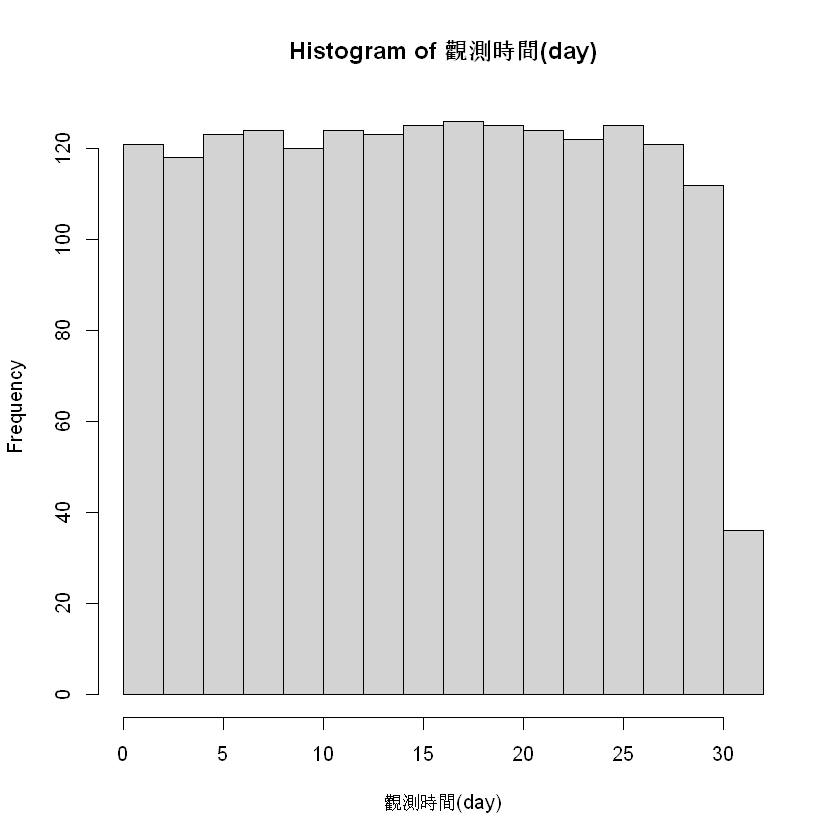

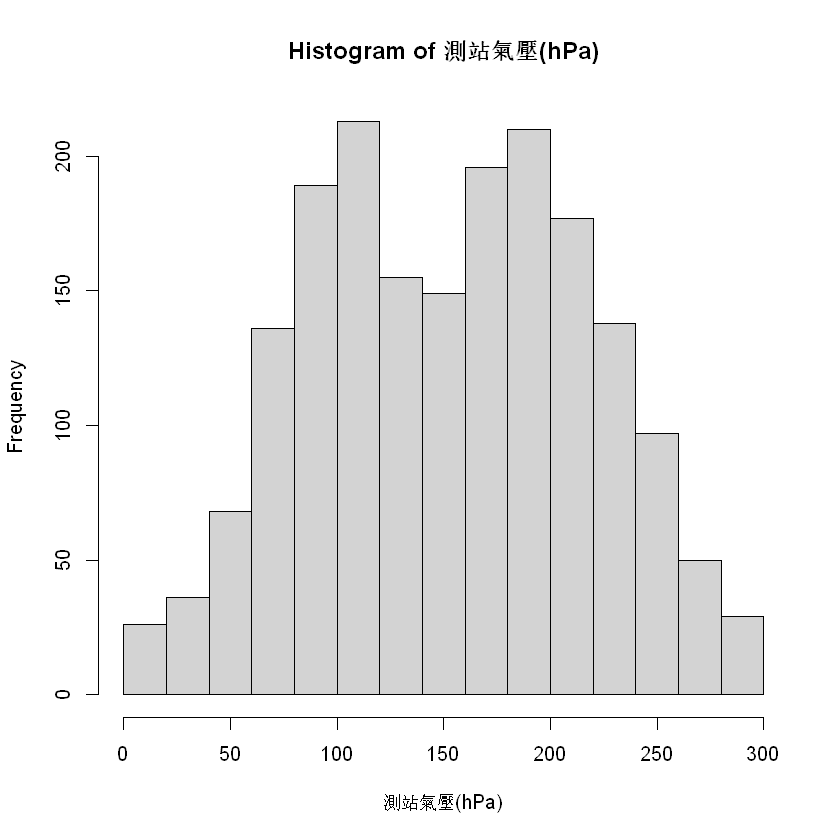

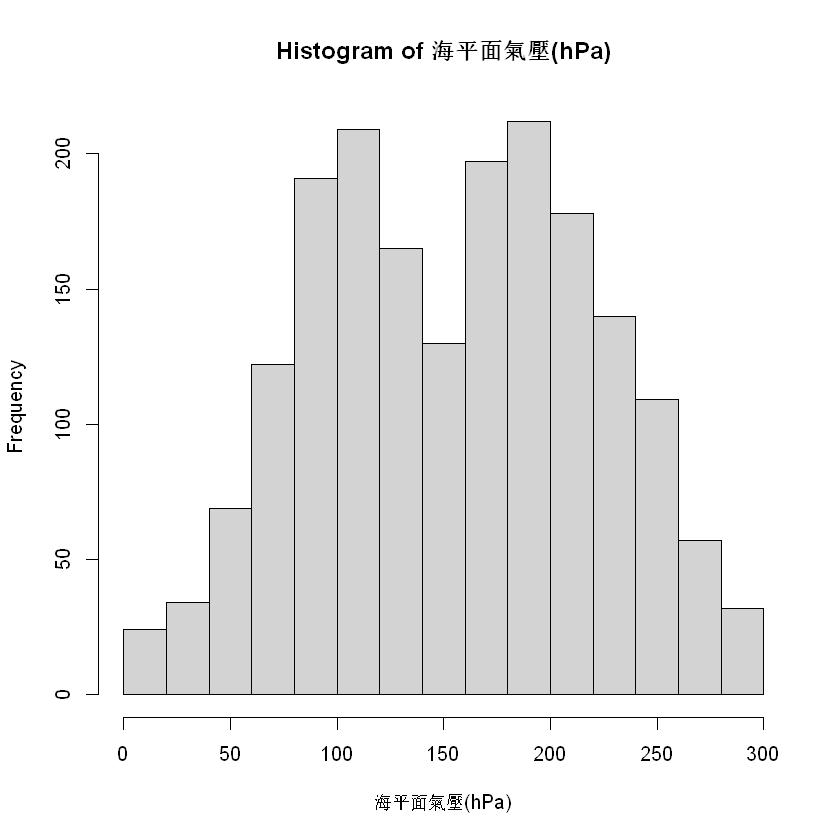

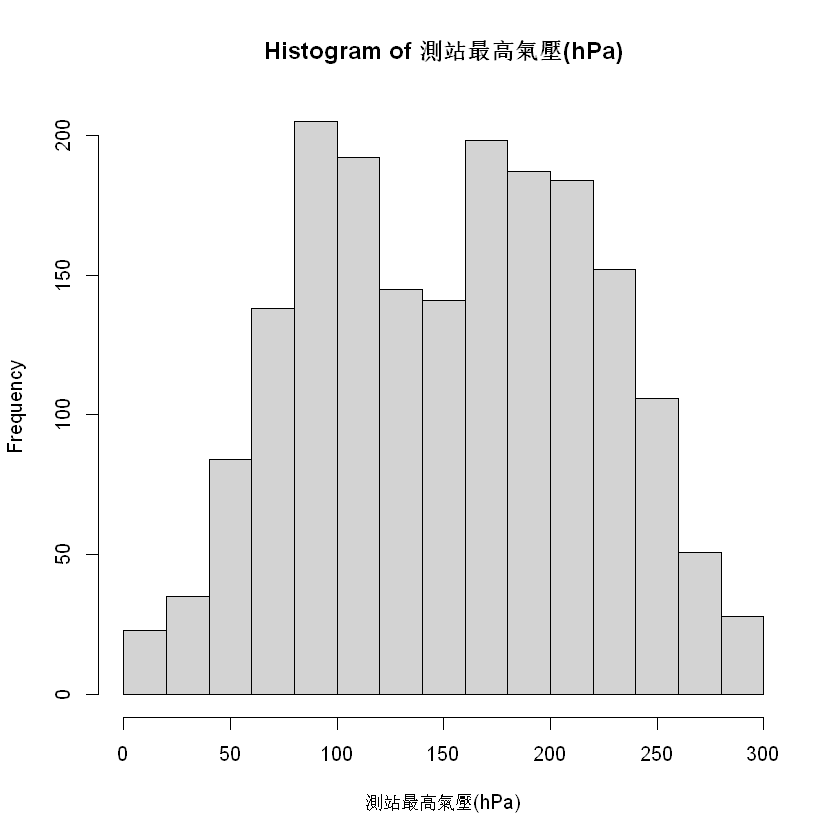

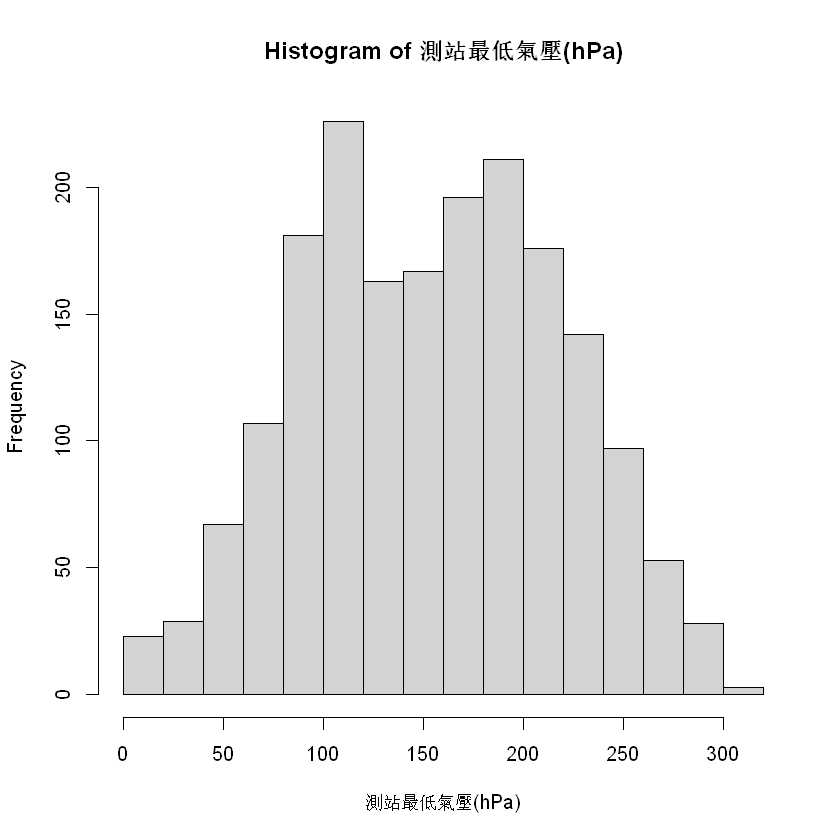

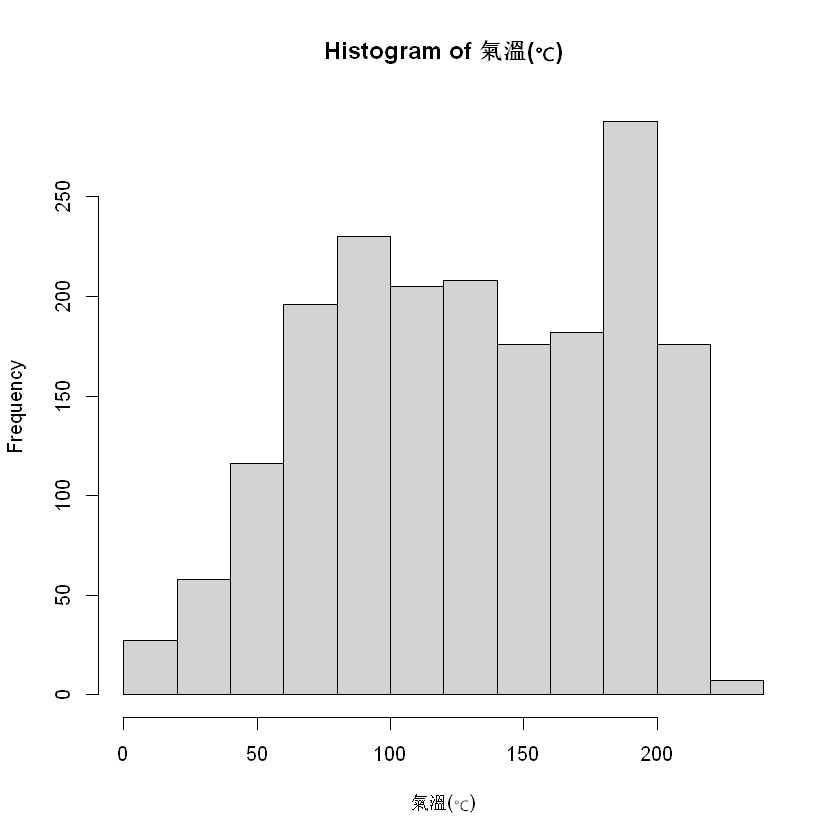

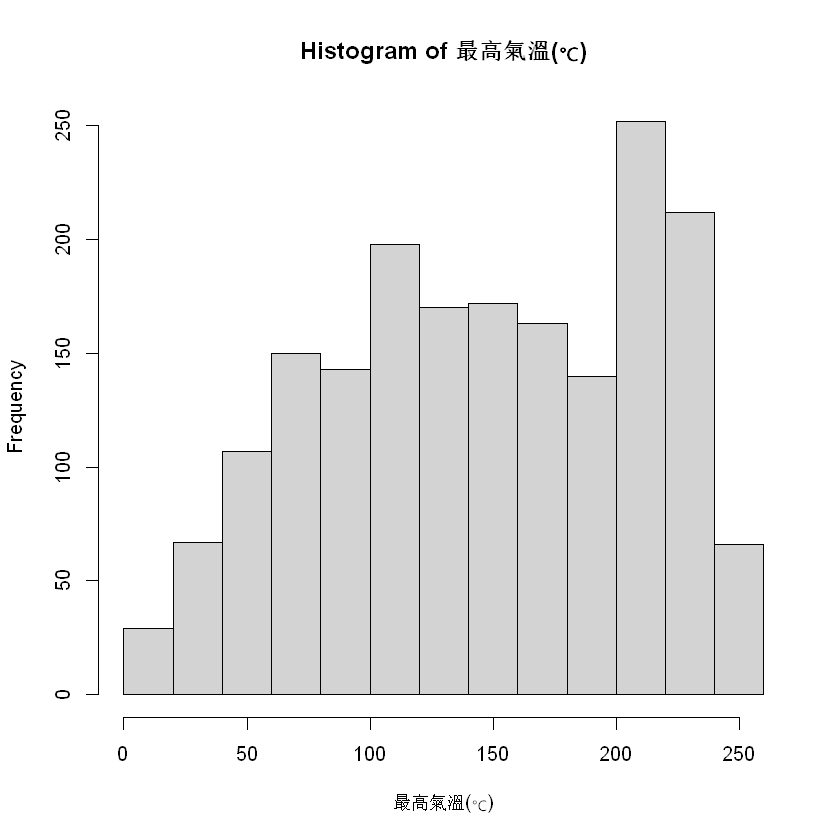

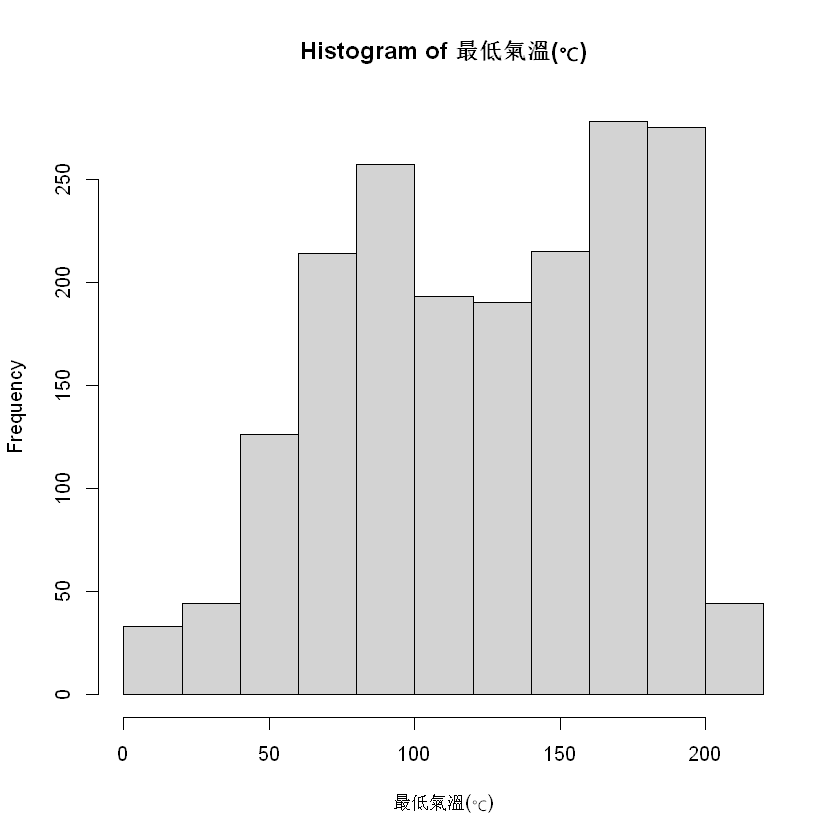

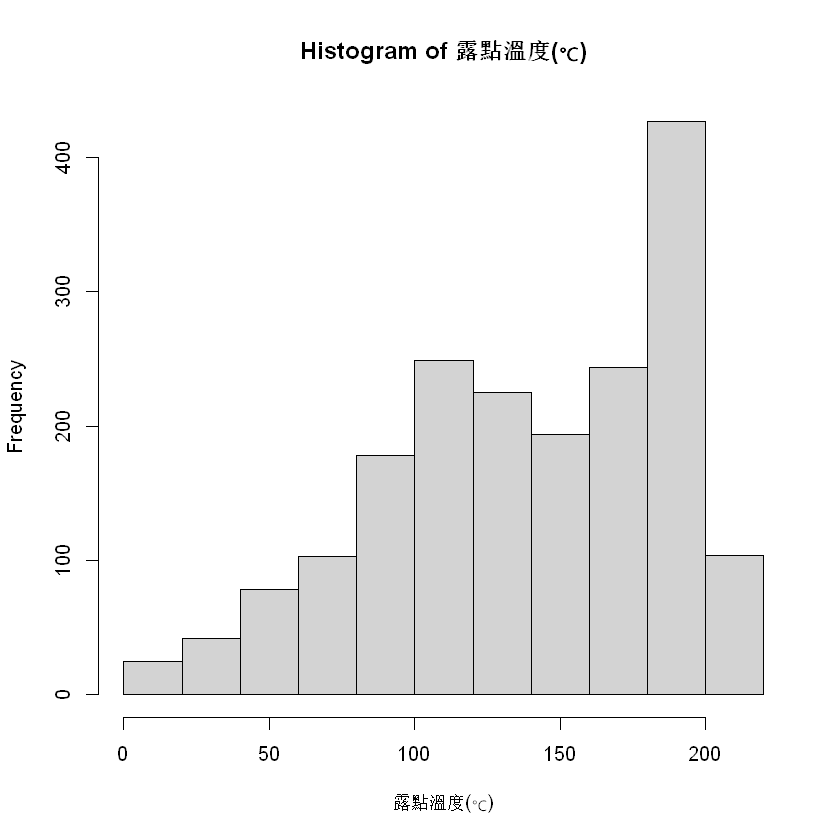

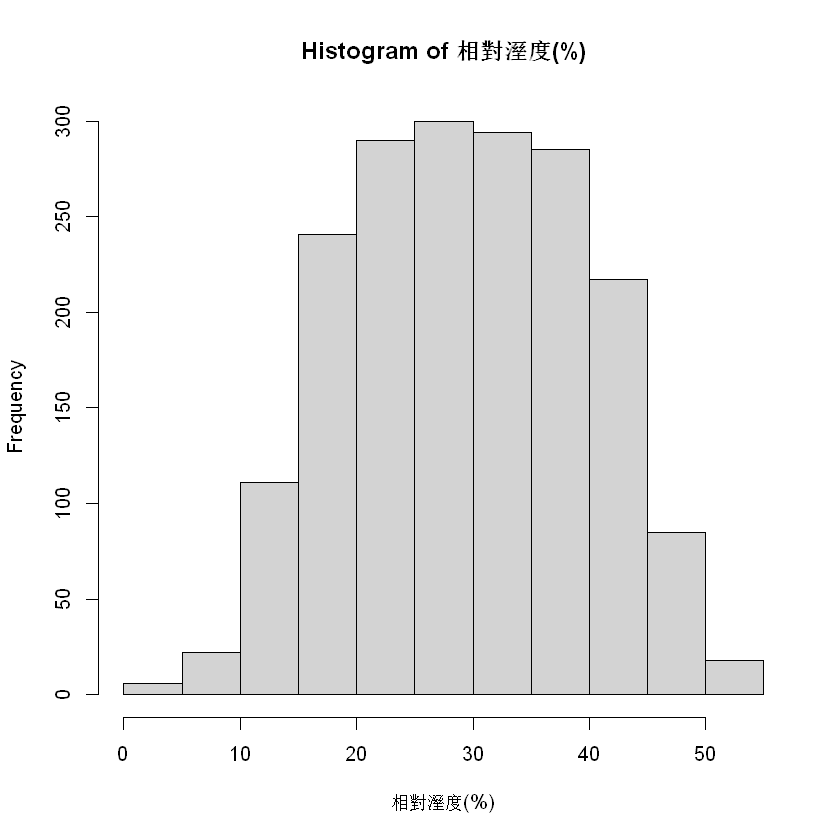

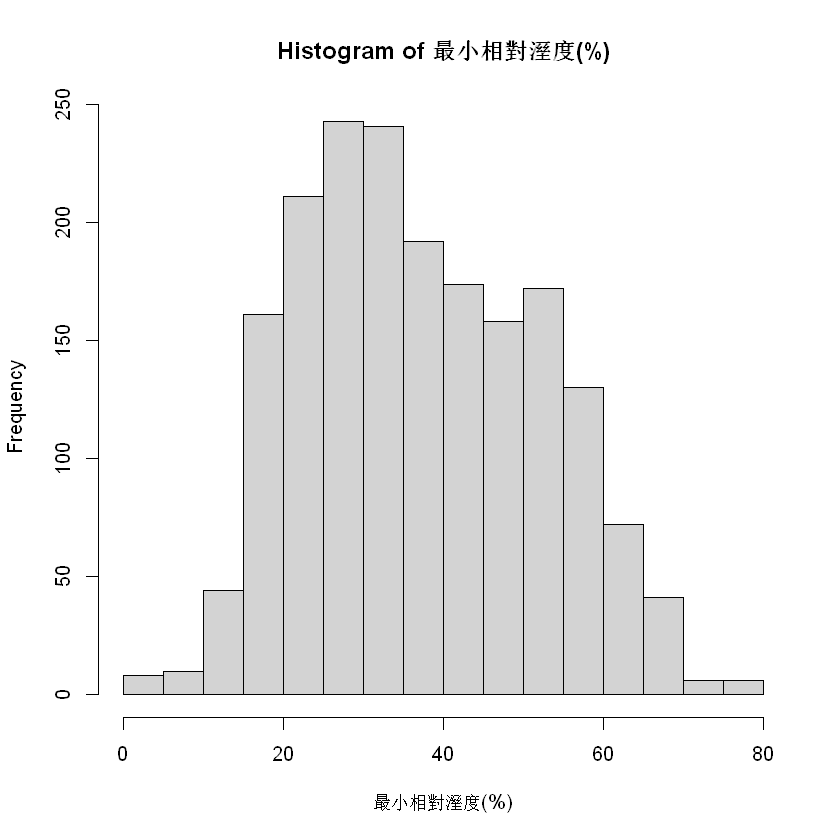

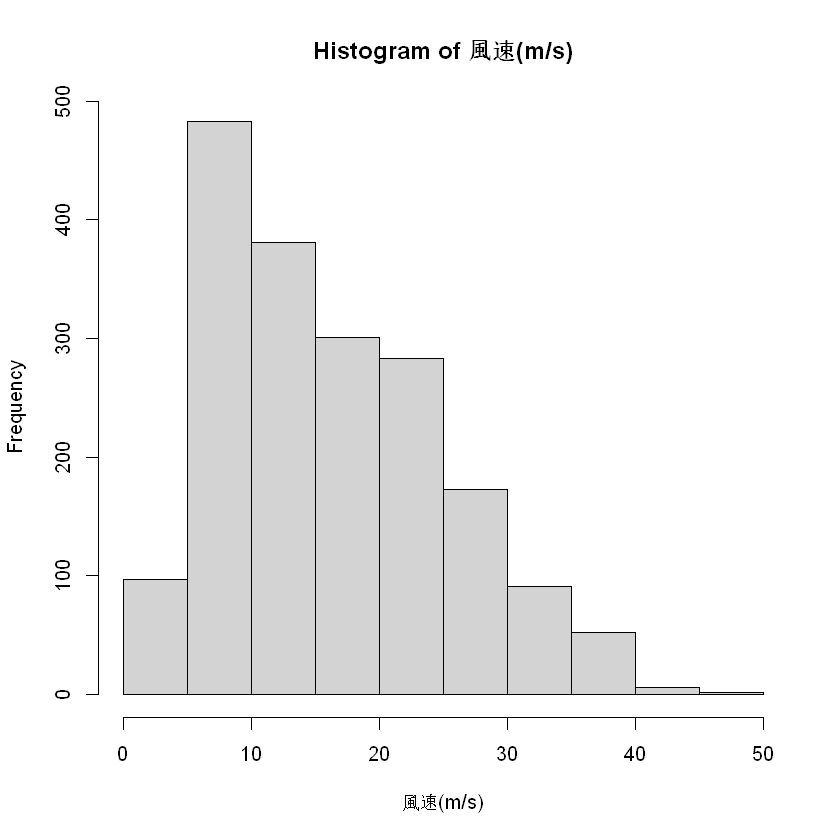

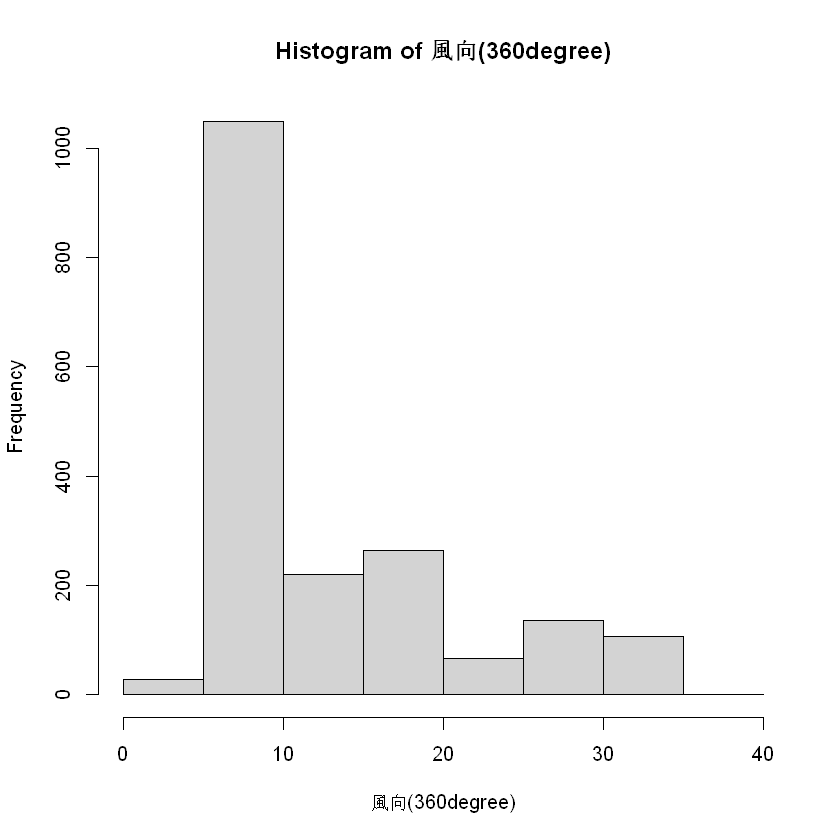

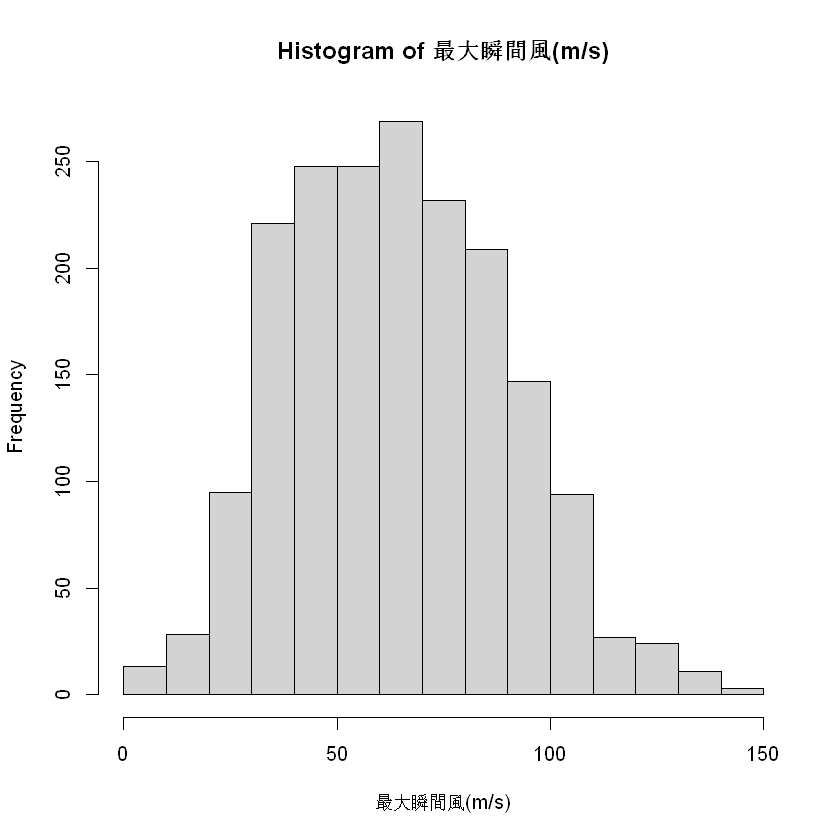

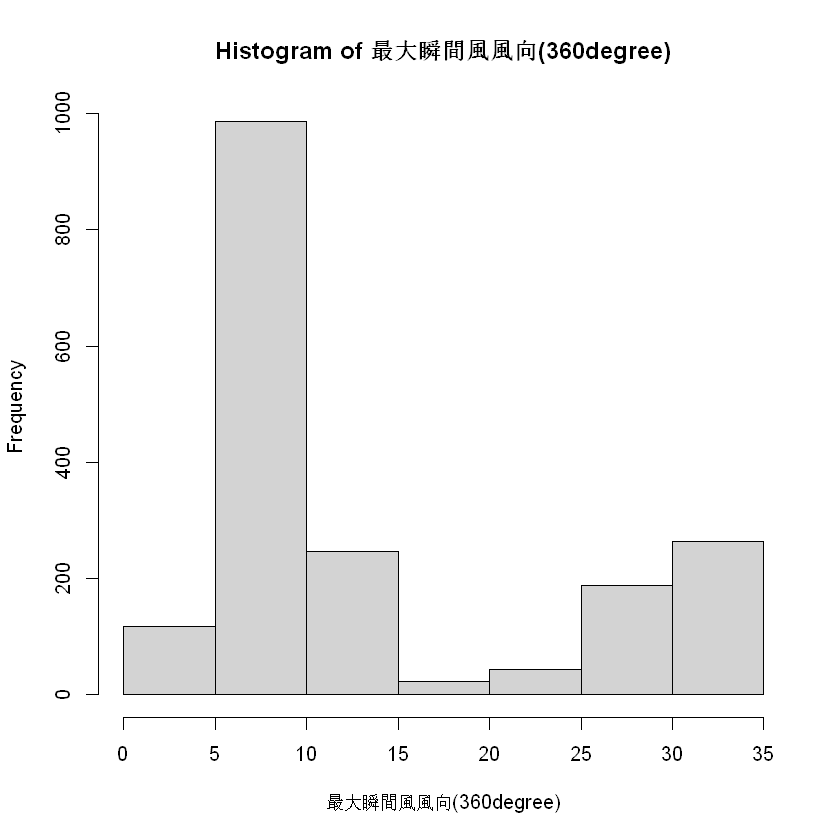

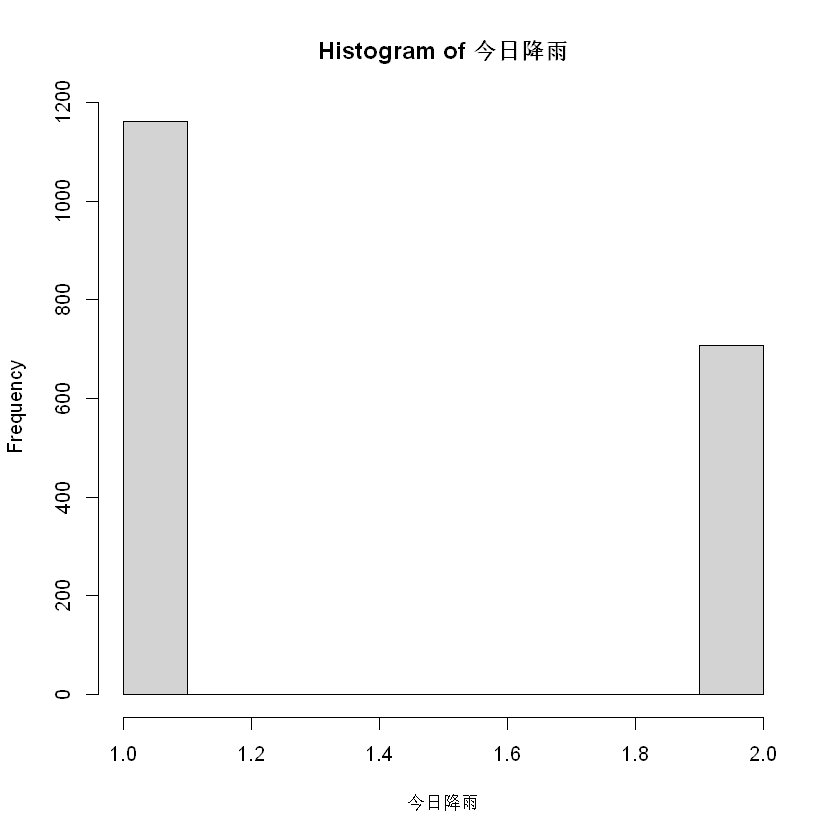

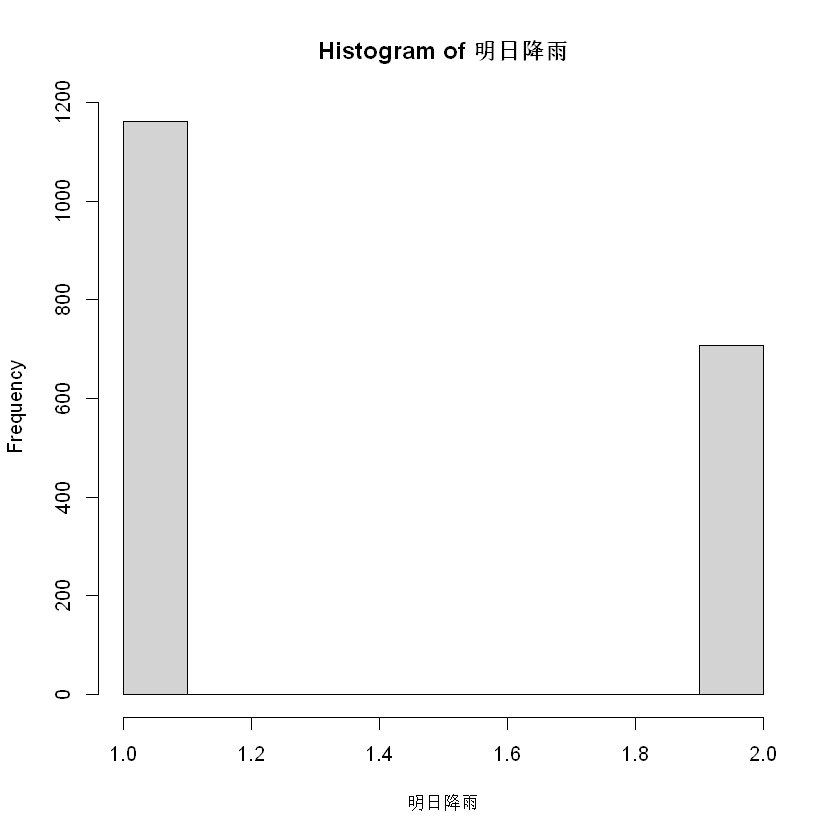

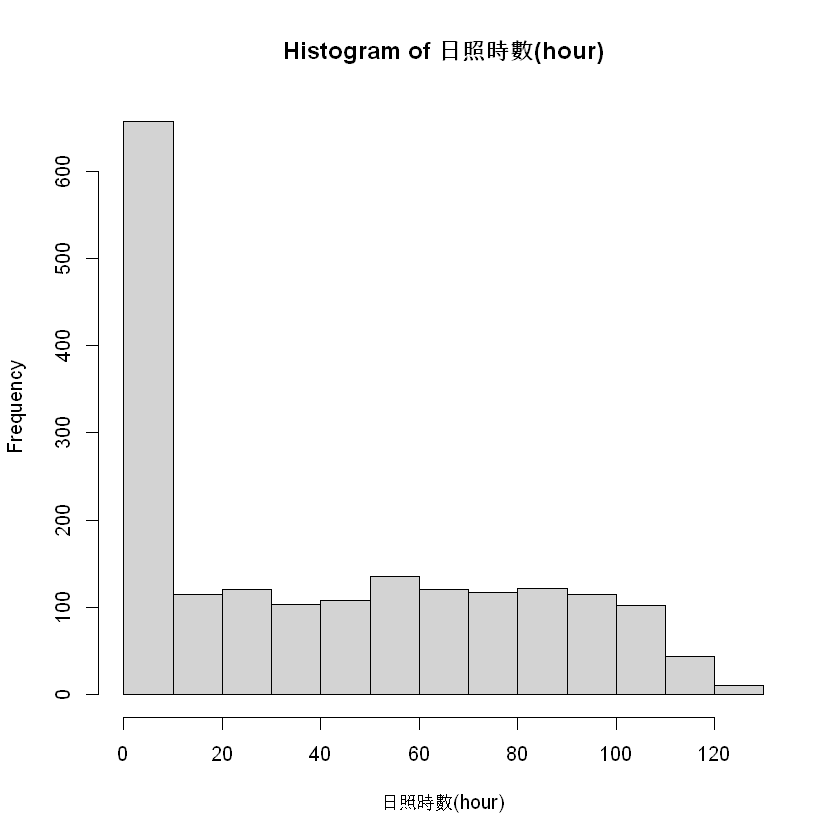

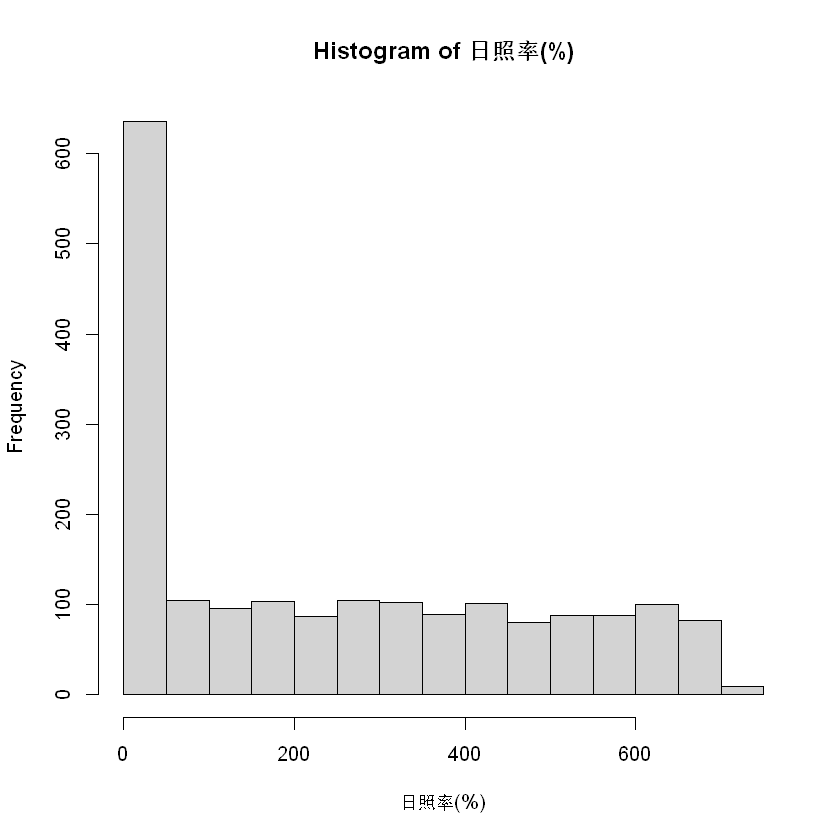

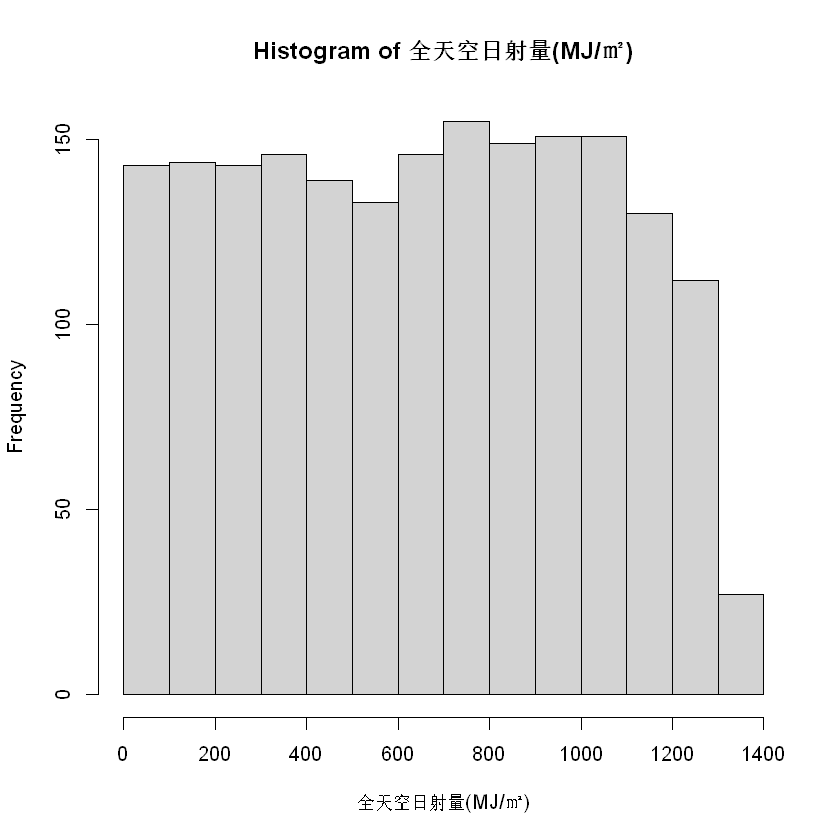

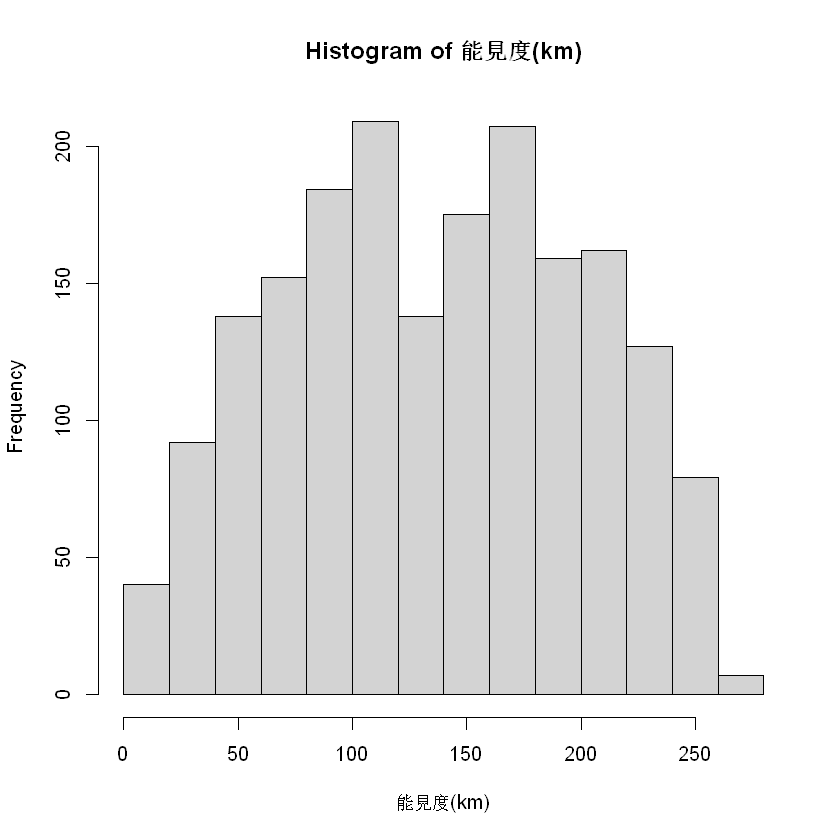

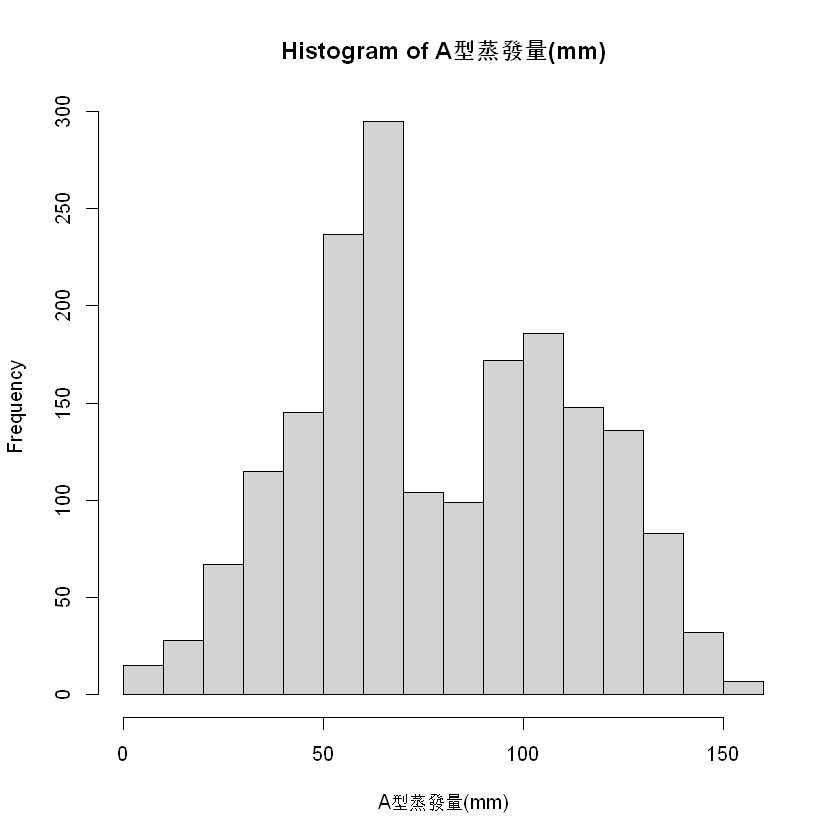

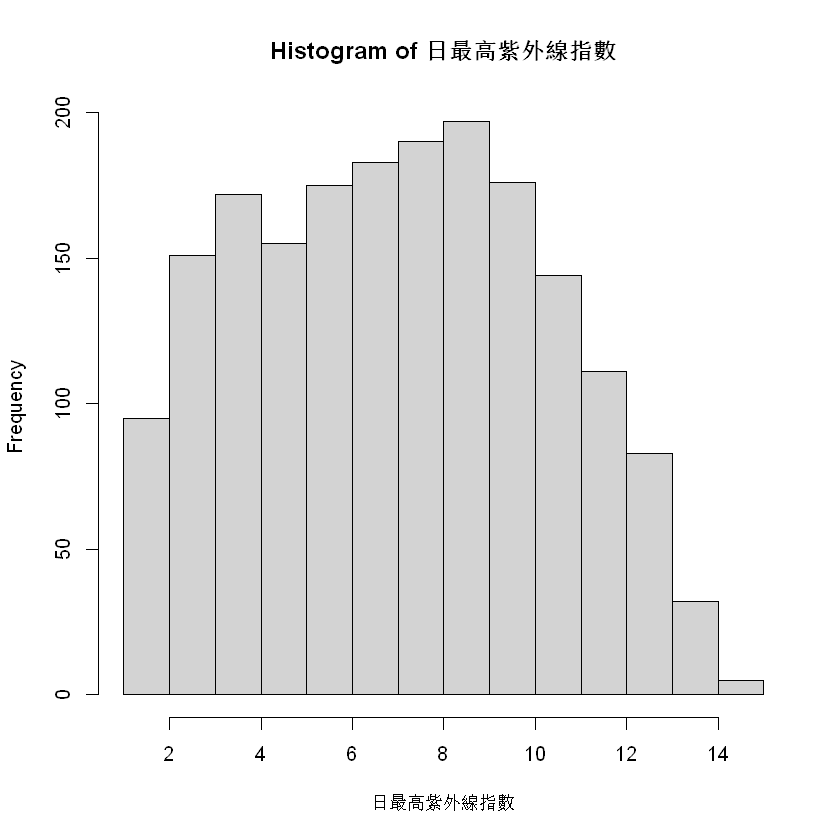

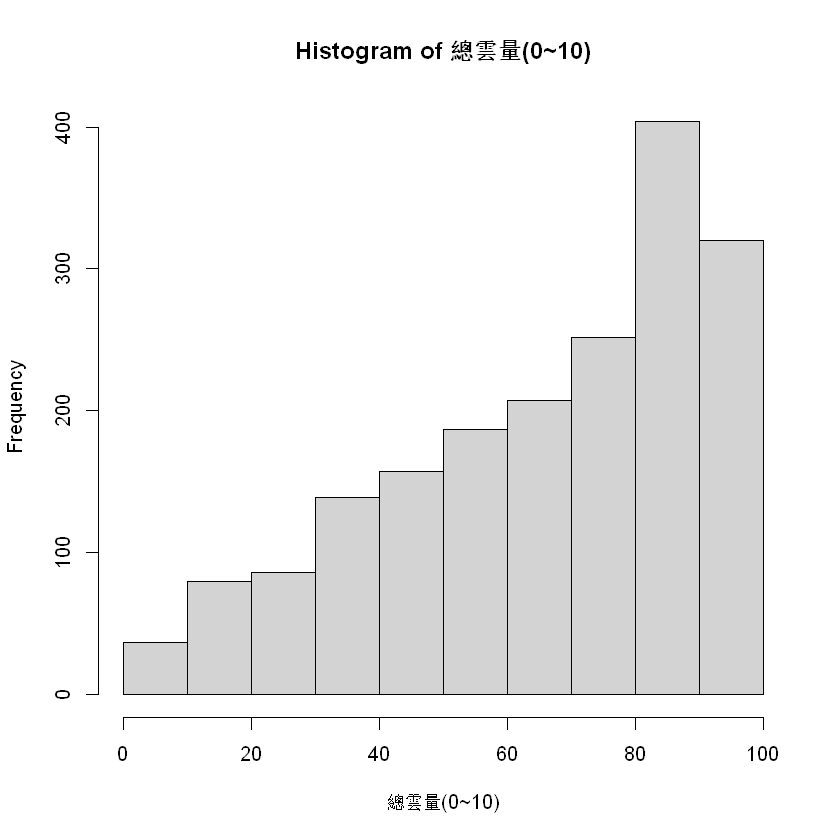

In [7]:
for(column_name in names(data)) {
    hist(data[[column_name]], main = paste("Histogram of", column_name), xlab = column_name)   
    }


In [8]:
skewness_values <- sapply(data, skewness)
print(skewness_values)


            觀測時間(day)             測站氣壓(hPa)           海平面氣壓(hPa) 
            -0.0009919073             -0.0149392377             -0.0194136962 
        測站最高氣壓(hPa)         測站最低氣壓(hPa)                   氣溫(℃) 
            -0.0157234502             -0.0158306717             -0.1690515978 
              最高氣溫(℃)               最低氣溫(℃)               露點溫度(℃) 
            -0.1985185294             -0.2230672585             -0.5372386431 
              相對溼度(%)           最小相對溼度(%)                 風速(m/s) 
            -0.0150030073              0.2500268511              0.6297859679 
          風向(360degree)           最大瞬間風(m/s) 最大瞬間風風向(360degree) 
             1.3586841112              0.2647930494              0.9829847659 
                 今日降雨                  明日降雨            日照時數(hour) 
             0.5019941149              0.5019941149              0.4184991579 
                日照率(%)       全天空日射量(MJ/㎡)                能見度(km) 
             0.4573762167              0.0041296019            

大多數欄位的數據分布接近對稱，唯風向較為偏斜

標準化

In [9]:
features <- data %>% dplyr::select(-c("明日降雨", "觀測時間(day)"))
target <- data$明日降雨
preProcValues <- preProcess(features, method = c("center", "scale"))
features <- predict(preProcValues, features)
summary(features)



 測站氣壓(hPa)     海平面氣壓(hPa)    測站最高氣壓(hPa)  測站最低氣壓(hPa) 
 Min.   :-2.3530   Min.   :-2.36459   Min.   :-2.31806   Min.   :-2.43843  
 1st Qu.:-0.7912   1st Qu.:-0.80305   1st Qu.:-0.82896   1st Qu.:-0.78437  
 Median : 0.0438   Median : 0.05426   Median : 0.05235   Median : 0.03478  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.7860   3rd Qu.: 0.78910   3rd Qu.: 0.81209   3rd Qu.: 0.77516  
 Max.   : 2.2550   Max.   : 2.21285   Max.   : 2.22522   Max.   : 2.31895  
    氣溫(℃)          最高氣溫(℃)        最低氣溫(℃)        露點溫度(℃)     
 Min.   :-2.40198   Min.   :-2.29294   Min.   :-2.48300   Min.   :-2.8270  
 1st Qu.:-0.83930   1st Qu.:-0.78458   1st Qu.:-0.80633   1st Qu.:-0.6977  
 Median : 0.03506   Median : 0.04815   Median : 0.07193   Median : 0.1212  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.94662   3rd Qu.: 0.95945   3rd Qu.: 0.93022   3rd Qu.: 0.8992  
 Max.   : 1.72796   Max.   : 1.74505   Max.   :

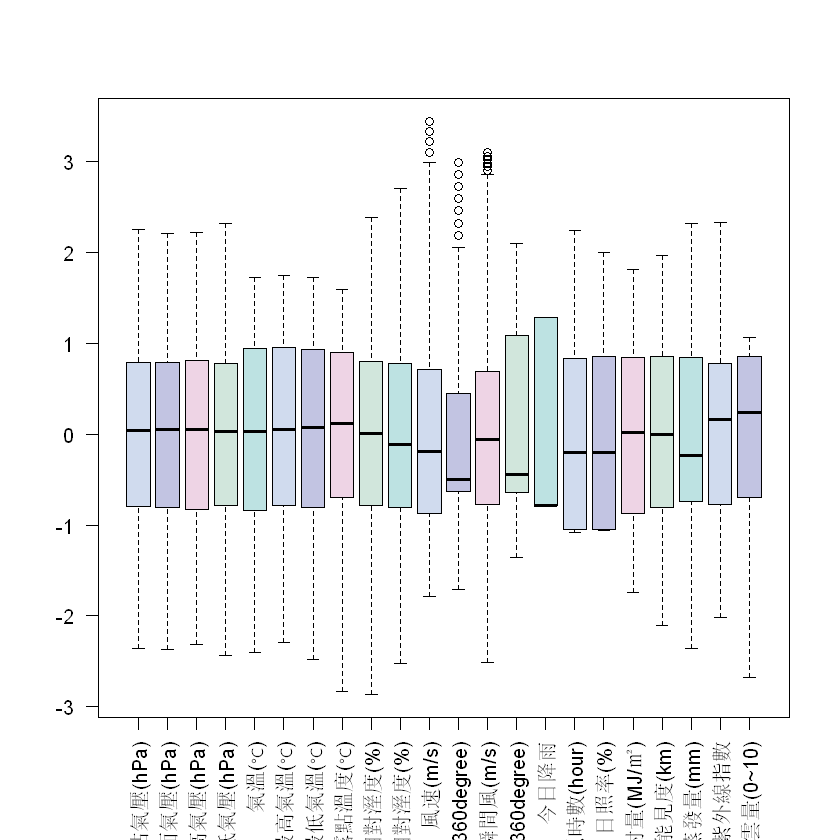

In [10]:
colours <- c("#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2")
boxplot(features, col=colours, las=2)


確認缺失值與數據範圍

In [12]:
sapply(features, function(x) sum(is.na(x)))

lapply(features, range, na.rm = TRUE)


測站氣壓(hPa)           海平面氣壓(hPa)         測站最高氣壓(hPa) 
                        0                         0                         0 
        測站最低氣壓(hPa)                   氣溫(℃)               最高氣溫(℃) 
                        0                         0                         0 
              最低氣溫(℃)               露點溫度(℃)               相對溼度(%) 
                        0                         0                         0 
          最小相對溼度(%)                 風速(m/s)           風向(360degree) 
                        0                         0                         0 
          最大瞬間風(m/s) 最大瞬間風風向(360degree)                  今日降雨 
                        0                         0                         0 
           日照時數(hour)                 日照率(%)       全天空日射量(MJ/㎡) 
                        0                         0                         0 
               能見度(km)             A型蒸發量(mm)          日最高紫外線指數 
                        0                         0                         0 
             總雲量(0~10) 
                        0

$`測站氣壓(hPa)`
[1] -2.352958  2.255001

$`海平面氣壓(hPa)`
[1] -2.364585  2.212845

$`測站最高氣壓(hPa)`
[1] -2.318059  2.225222

$`測站最低氣壓(hPa)`
[1] -2.438429  2.318946

$`氣溫(℃)`
[1] -2.401979  1.727959

$`最高氣溫(℃)`
[1] -2.292940  1.745053

$`最低氣溫(℃)`
[1] -2.483000  1.728639

$`露點溫度(℃)`
[1] -2.826980  1.595321

$`相對溼度(%)`
[1] -2.866199  2.391135

$`最小相對溼度(%)`
[1] -2.526511  2.706439

$`風速(m/s)`
[1] -1.785213  3.445758

$`風向(360degree)`
[1] -1.704351  2.996899

$`最大瞬間風(m/s)`
[1] -2.512777  3.102727

$`最大瞬間風風向(360degree)`
[1] -1.357941  2.104670

$今日降雨
[1] -0.7798129  1.2816727

$`日照時數(hour)`
[1] -1.076977  2.245381

$`日照率(%)`
[1] -1.060618  2.003302

$`全天空日射量(MJ/㎡)`
[1] -1.737792  1.809867

$`能見度(km)`
[1] -2.104055  1.966963

$`A型蒸發量(mm)`
[1] -2.360158  2.317610

$日最高紫外線指數
[1] -2.019854  2.336876

$`總雲量(0~10)`
[1] -2.674489  1.067301

In [13]:
features$明日降雨 <- target


去除離群值

In [15]:



features <- features[features$`測站氣壓(hPa)` < 2.3 & features$`測站氣壓(hPa)` > -2.3, ]
features <- features[features$`海平面氣壓(hPa)` < 2.3 & features$`海平面氣壓(hPa)` > -2.3, ]
features <- features[features$`測站最高氣壓(hPa)` < 2.3 & features$`測站最高氣壓(hPa)` > -2.3, ]
features <- features[features$`測站最低氣壓(hPa)` < 2.3 & features$`測站最低氣壓(hPa)` > -2.3, ]
features <- features[features$`氣溫(℃)` < 2.3 & features$`氣溫(℃)` > -2.3, ]
features <- features[features$`最低氣溫(℃)` < 2.3 & features$`最低氣溫(℃)` > -2.3, ]
features <- features[features$`相對溼度(%)` < 2.3 & features$`相對溼度(%)` > -2.3, ]
features <- features[features$`風速(m/s)` < 2.3 & features$`風速(m/s)` > -2.3, ]
features <- features[features$`最大瞬間風(m/s)` < 2.3 & features$`最大瞬間風(m/s)` > -2.3, ]
features <- features[features$`A型蒸發量(mm)` < 2.3 & features$`A型蒸發量(mm)` > -2.3, ]
features <- features[features$`日最高紫外線指數` < 2.3 & features$`日最高紫外線指數` > -2.3, ]
features <- features[features$`總雲量(0~10)` < 2.3 & features$`總雲量(0~10)` > -2.3, ]


summary(features)





 測站氣壓(hPa)      海平面氣壓(hPa)    測站最高氣壓(hPa)  測站最低氣壓(hPa) 
 Min.   :-2.26018   Min.   :-2.25742   Min.   :-2.19650   Min.   :-2.29665  
 1st Qu.:-0.80666   1st Qu.:-0.80305   1st Qu.:-0.84415   1st Qu.:-0.78437  
 Median :-0.00259   Median : 0.00833   Median : 0.02196   Median : 0.00327  
 Mean   :-0.01684   Mean   :-0.01680   Mean   :-0.01955   Mean   :-0.01423  
 3rd Qu.: 0.73963   3rd Qu.: 0.74317   3rd Qu.: 0.78170   3rd Qu.: 0.72790  
 Max.   : 2.20861   Max.   : 2.16692   Max.   : 2.19483   Max.   : 2.27169  
    氣溫(℃)          最高氣溫(℃)        最低氣溫(℃)        露點溫度(℃)     
 Min.   :-2.27176   Min.   :-2.21438   Min.   :-2.26344   Min.   :-2.7246  
 1st Qu.:-0.80209   1st Qu.:-0.77673   1st Qu.:-0.76641   1st Qu.:-0.6363  
 Median : 0.05366   Median : 0.06387   Median : 0.09189   Median : 0.1622  
 Mean   : 0.02466   Mean   : 0.01816   Mean   : 0.03282   Mean   : 0.0463  
 3rd Qu.: 0.94662   3rd Qu.: 0.98302   3rd Qu.: 0.93022   3rd Qu.: 0.9197  
 Max.   : 1.72796   Max.   : 1.74505   M

計算相關係數與p-value

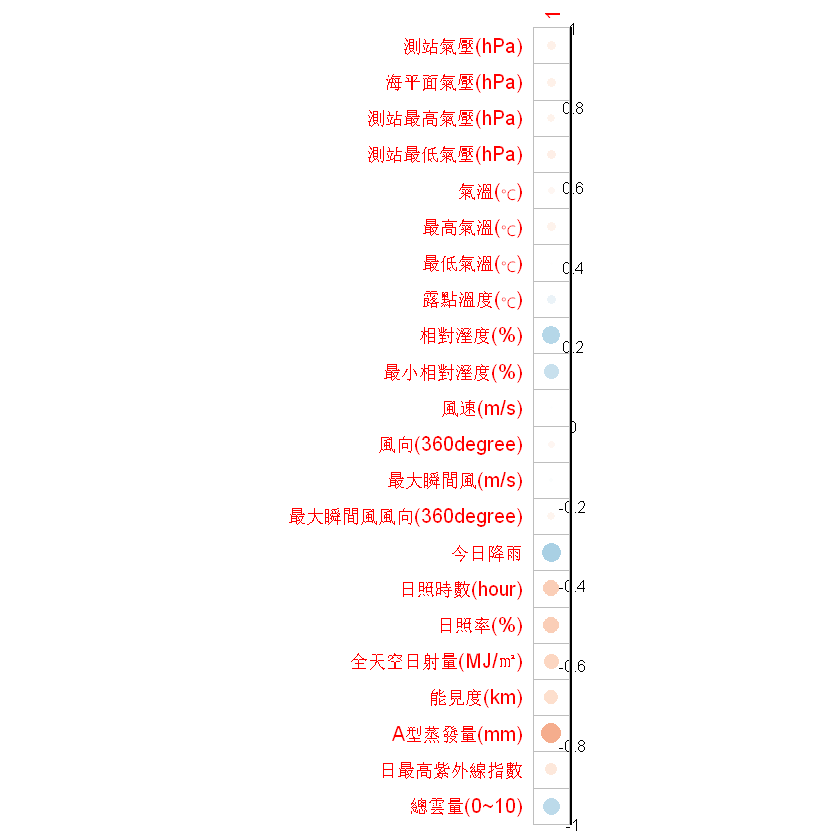

In [151]:
correlation_matrix <- cor(features[, -ncol(features)], features$明日降雨)

corrplot(correlation_matrix, method="circle")


In [153]:
for(i in 1:(ncol(features)-1)) {
  test_result <- cor.test(features[,i], features$明日降雨)
  cat("Feature:", names(features)[i], "Correlation:", test_result$estimate, "P-value:", test_result$p.value, "\n")
  }

Feature: 測站氣壓(hPa) Correlation: -0.07576015 P-value: 0.001691515 
Feature: 海平面氣壓(hPa) Correlation: -0.07448555 P-value: 0.002024078 
Feature: 測站最高氣壓(hPa) Correlation: -0.06714188 P-value: 0.005408682 
Feature: 測站最低氣壓(hPa) Correlation: -0.08010251 P-value: 0.0008996344 
Feature: 氣溫(℃) Correlation: -0.04530078 P-value: 0.06070797 
Feature: 最高氣溫(℃) Correlation: -0.06903804 P-value: 0.004231464 
Feature: 最低氣溫(℃) Correlation: -0.009671708 P-value: 0.6889742 
Feature: 露點溫度(℃) Correlation: 0.08010069 P-value: 0.0008998784 
Feature: 相對溼度(%) Correlation: 0.2891941 P-value: 2.155058e-34 
Feature: 最小相對溼度(%) Correlation: 0.2259795 P-value: 2.683473e-21 
Feature: 風速(m/s) Correlation: 0.007115052 P-value: 0.7684206 
Feature: 風向(360degree) Correlation: -0.04885041 P-value: 0.0430986 
Feature: 最大瞬間風(m/s) Correlation: 0.01459728 P-value: 0.5457758 
Feature: 最大瞬間風風向(360degree) Correlation: -0.05892215 P-value: 0.01466864 
Feature: 今日降雨 Correlation: 0.3251407 P-value: 1.619399e-43 
Feature: 日照時數(hour) Co

顯著性是指p-value<0.05，根據前提，觀測時間、最低氣溫、風速、最大瞬間風跟目標不具顯著性

簡單建模測試，保留氣溫會提升3%，保留風向會掉7%

In [162]:
names(features)

[1] "測站氣壓(hPa)"             "海平面氣壓(hPa)"          
 [3] "測站最高氣壓(hPa)"         "測站最低氣壓(hPa)"        
 [5] "氣溫(℃)"                   "最高氣溫(℃)"              
 [7] "最低氣溫(℃)"               "露點溫度(℃)"              
 [9] "相對溼度(%)"               "最小相對溼度(%)"          
[11] "風速(m/s)"                 "風向(360degree)"          
[13] "最大瞬間風(m/s)"           "最大瞬間風風向(360degree)"
[15] "今日降雨"                  "日照時數(hour)"           
[17] "日照率(%)"                 "全天空日射量(MJ/㎡)"      
[19] "能見度(km)"                "A型蒸發量(mm)"            
[21] "日最高紫外線指數"          "總雲量(0~10)"             
[23] "明日降雨"

In [199]:
X <- dplyr::select(features, -c("明日降雨","最低氣溫(℃)","風速(m/s)","風向(360degree)","最大瞬間風風向(360degree)"))


y <- features$明日降雨

In [200]:
set.seed(123) 
train_index <- sample(1:nrow(X), size = 0.8*nrow(X))
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]

KNN中，LDA的正確率比PCA高了約3%，所以採用LDA作為降為手段

In [211]:
lda_model <- lda(X_train, grouping = y_train)

X_train_lda <- predict(lda_model, X_train)$x
X_test_lda <- predict(lda_model, X_test)$x

k <- 7
knn_model <- knn(train = X_train_lda, test = X_test_lda, cl = y_train, k = k)


accuracy <- sum(knn_model == y_test) / length(y_test)
print(paste('Accuracy of KNN with PCA:', format(accuracy, digits=4)))




[1] "Accuracy of KNN with PCA: 0.723"


In [213]:
y_pred_train <- knn(train = X_train_lda, test = X_train_lda, cl = y_train, k = 3)
y_pred_test <- knn(train = X_test_lda, test = X_test_lda, cl = y_test, k = 3)
accuracy_train <- sum(y_pred_train == y_train) / length(y_train)
accuracy_test <- sum(y_pred_test == y_test) / length(y_test)
print(paste('Training set score:', format(accuracy_train, nsmall = 4)))
print(paste('Test set score:', format(accuracy_test, nsmall = 4)))

[1] "Training set score: 0.8163265"
[1] "Test set score: 0.8221574"
